# Importing Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

# Loading dataset file

In [37]:
dataset=pd.read_csv(r"D:\ABS-20230128T044722Z-001\Z_OASIS_INFOBYTE\Unemployment_in_india\Unemployment_Rate_upto_11_2020.csv")

# Explore dataset

In [38]:
# Itentify how dataset looks like
dataset.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [39]:
# Explore features, datatypes, entries in dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [40]:
# Statistical analysis 
dataset.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [41]:
# check dataset for null values
dataset.isnull()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
262,False,False,False,False,False,False,False,False,False
263,False,False,False,False,False,False,False,False,False
264,False,False,False,False,False,False,False,False,False
265,False,False,False,False,False,False,False,False,False


In [42]:
#remove null values and verify it
cleaned_dataset = dataset.dropna()

cleaned_dataset.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [43]:
# information of updated dataset after removing null entries
cleaned_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [44]:
c_data=cleaned_dataset

In [45]:
# Unique values in Region column and it's count
unique_regions = c_data['Region'].unique() 
print('Unique Regions...\n',unique_regions)

print('\n Total no. of Unique Regions=',len(unique_regions))

Unique Regions...
 ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']

 Total no. of Unique Regions= 27


In [46]:
# State and Area vise average of Estimated Unemployment Rate

state_and_area_vise_average_unemployment_rate=c_data.groupby(['Region'])[' Estimated Unemployment Rate (%)'].mean()
state_and_area_vise_average_unemployment_rate

Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name:  Estimated Unemployment Rate (%), dtype: float64

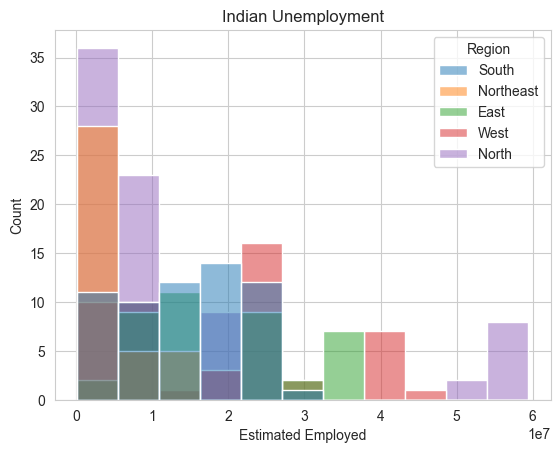

In [47]:
dataset.columns= ["States","Date","Frequency",
               "Estimated Unemployment Rate","Estimated Employed",
               "Estimated Labour Participation Rate","Region",
               "longitude","latitude"]
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Employed", hue="Region", data=dataset)
plt.show()

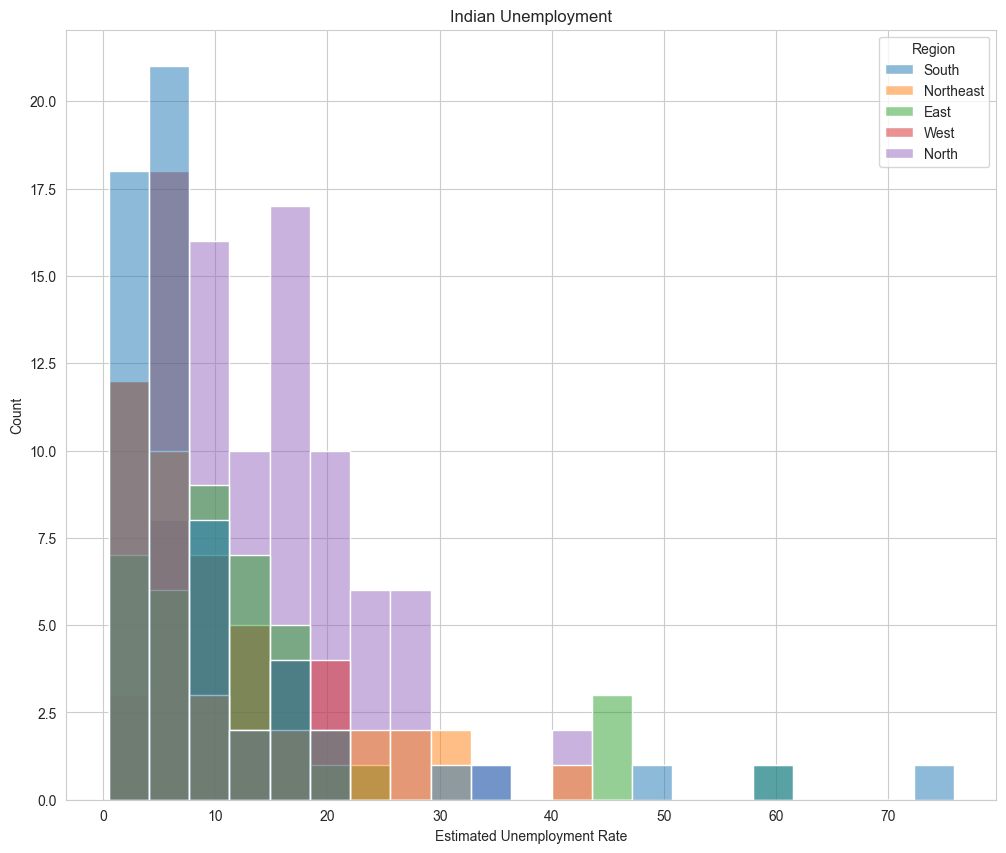

In [48]:
plt.figure(figsize=(12, 10))
plt.title("Indian Unemployment")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=dataset)
plt.show()

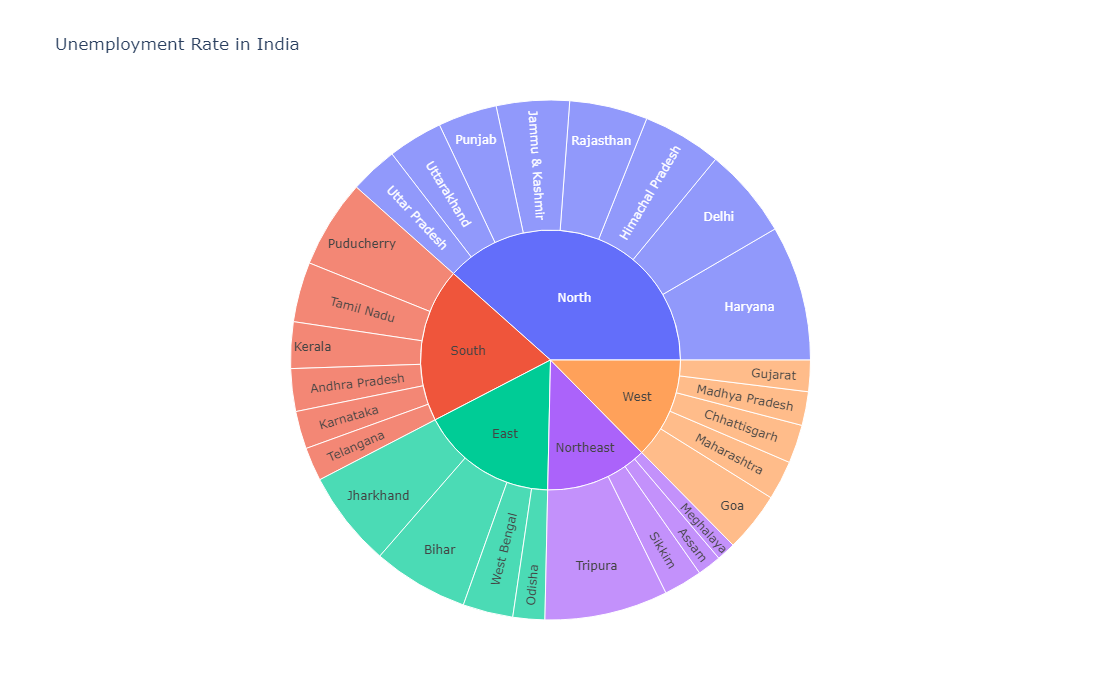

In [49]:
unemploment = dataset[["States", "Region", "Estimated Unemployment Rate"]]
figure = px.sunburst(unemploment, path=["Region", "States"], 
                     values="Estimated Unemployment Rate", 
                     width=700, height=700, color_continuous_scale="RdY1Gn", 
                     title="Unemployment Rate in India")
figure.show()

# Summary

# By performing this analysis we can conclude that people belong to South and North region having more unemployment rate with respect to people belong to North-East and West region 